In [12]:
import pandas as pd  
import numpy as np  
import matplotlib.pyplot as plt
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier  
from sklearn.metrics import classification_report, confusion_matrix, precision_recall_fscore_support, accuracy_score  
from sklearn.linear_model import LogisticRegression
from sklearn import datasets
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from scipy.io import loadmat
import itertools
from sklearn import metrics
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn import tree
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier
np.set_printoptions(threshold=np.nan)

pdata = pd.read_csv("../Data/preprocessed_alcohol_balance.csv")
# pdata = pdata.drop(["Unnamed: 0"], axis=1)
pdata['Conditie'] = pdata['Conditie'].map({'norm': 0,  'bril': 1})
# pdata

,TestID,Conditie,SubjectID,SegmentNr,WalkingDirection,SegmentData,Alcohol,Height,Weight,Age,...,Balance_APrange,Balance_APstdev',Balance_APmeanVelocity,Balance_MeanVelocity,GaitVelocity,MovementVelocity,mad_SegmentData,mean_StepLength,Velocity,Alcohol_Class
0,006A01',0,6,1,away,[[array([[0.04697253]]) array([[-0.18321628]])...,0.00,177,70.0,20,...,8.955034,2.367358,2.674099,4.725911,1.130575,1.133883,0.048709,0.610128,2.333333,0
1,006A01',0,6,2,towards,[[array([[0.40771624]]) array([[-0.22044282]])...,0.00,177,70.0,20,...,8.955034,2.367358,2.674099,4.725911,1.237257,1.246712,0.031206,0.681944,2.066667,0
2,006A01',0,6,3,away,[[array([[0.09305737]]) array([[-0.19160482]])...,0.00,177,70.0,20,...,8.955034,2.367358,2.674099,4.725911,1.274628,1.286475,0.022252,0.713798,2.033333,0
3,006A01',0,6,4,towards,[[array([[0.44424376]]) array([[-0.2283845]]) ...,0.00,177,70.0,20,...,8.955034,2.367358,2.674099,4.725911,1.060707,1.082892,0.060879,0.651639,2.333333,0
4,009A01',0,9,1,away,[[array([[-0.08974021]]) array([[-0.0481508]])...,0.00,195,86.0,23,...,5.751258,1.077709,1.763952,5.022392,1.093219,1.107944,0.025316,0.768314,2.066667,0
5,009A01',0,9,2,towards,[[array([[0.47497733]]) array([[-0.09702823]])...,0.00,195,86.0,23,...,5.751258,1.077709,1.763952,5.022392,1.136413,1.138623,0.024061,0.685495,2.300000,0
6,009A01',0,9,3,away,[[array([[0.00489379]]) array([[-0.07232992]])...,0.00,195,86.0,23,...,5.751258,1.077709,1.763952,5.022392,1.107233,1.112921,0.015080,0.689099,2.333333,0
7,009A01',0,9,4,towards,[[array([[0.51498991]]) array([[-0.09675995]])...,0.00,195,86.0,23,...,5.751258,1.077709,1.763952,5.022392,1.123102,1.124893,0.013693,0.660362,2.266667,0
8,010A01',0,10,1,away,[[array([[-0.33516738]]) array([[-0.30029692]]...,0.00,165,65.0,28,...,3.566472,0.860375,1.478939,4.189830,0.962063,0.970962,0.056155,0.538055,2.666667,0
9,010A01',0,10,2,towards,[[array([[0.54318447]]) array([[-0.34777679]])...,0.00,165,65.0,28,...,3.566472,0.860375,1.478939,4.189830,0.811524,0.824569,0.021438,0.571604,3.000000,0


In [13]:
X = pdata.drop(['Conditie', 'TestID', 'SubjectID', 'SegmentNr', 'WalkingDirection', 'SegmentData'], axis=1)
Y = pdata['Conditie']
from pandas import read_csv
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
# feature extraction
model = LogisticRegression()
rfe = RFE(model, 2)
fit = rfe.fit(X, Y)
print("Num Features: %d" % fit.n_features_)
print("Selected Features: %s" % fit.support_)
print("Feature Ranking: %s" % fit.ranking_)
list(X)

Num Features: 2
Selected Features: [False False False False False False False False False False False False
  True False False  True False False]
Feature Ranking: [ 6 15 14 17 13 12  7 16  9  8 10 11  1  3  4  1  2  5]


['Alcohol',
 'Height',
 'Weight',
 'Age',
 'BMI',
 'Balance_MLrange',
 'Balance_MLstdev',
 'Balance_MLmeanVelocity',
 'Balance_APrange',
 "Balance_APstdev'",
 'Balance_APmeanVelocity',
 'Balance_MeanVelocity',
 'GaitVelocity',
 'MovementVelocity',
 'mad_SegmentData',
 'mean_StepLength',
 'Velocity',
 'Alcohol_Class']

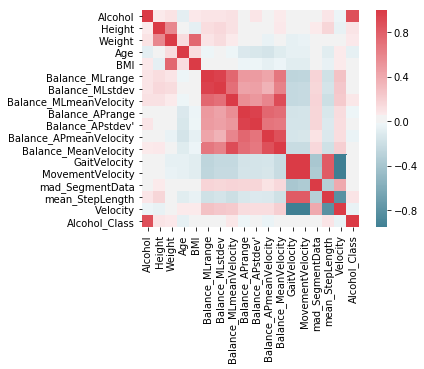

In [3]:
import seaborn as sns
corr = X.corr()
sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool), cmap=sns.diverging_palette(220, 10, as_cmap=True), square=True)

In [14]:
#Splits data into training and validation according to specified ratio
def validation_split(data, ratio):
    sidlist = data['SubjectID'].unique()
    gdata = [data[data['SubjectID']==sid] for sid in sidlist]
    np.random.shuffle(gdata)
    N = len(gdata)
    training = gdata[:int(ratio*N)]
    validation = gdata[(int(ratio*N)):]
    return training,validation

# Converts the arrays in a list to one flattend dataframe
def flatten(data, variable_list):
    return pd.DataFrame(np.vstack(data), columns=variable_list)

def get_split_data(originaldata, variable_list, ratio):
    data = originaldata[variable_list]
    training,validation = validation_split(data, 0.7)
    training = flatten(training, variable_list)
    validation = flatten(validation, variable_list)

    X_train = training.drop(['Conditie', 'SubjectID'], axis=1)
    y_train = training['Conditie']
    X_train = X_train.astype(float)
    y_train = y_train.astype(int)
    
    X_test = validation.drop(['Conditie', 'SubjectID'], axis=1)
    y_test = validation['Conditie']
    X_test = X_test.astype(float)
    y_test = y_test.astype(int)
    return X_train, X_test, y_train, y_test

collist =  ['SubjectID', 'Conditie','mean_StepLength', 'GaitVelocity']
X_train, X_test, y_train, y_test = get_split_data(pdata, collist , 0.7)


X_train = np.array(X_train, dtype=float)
y_train = np.array(y_train, dtype=int)

X_test = np.array(X_test, dtype=float)
y_test = np.array(y_test, dtype=int)


Accuracy of our model is equal 85.37 %.
Confusion matrix, without normalization
[[166  22]
 [ 33 155]]


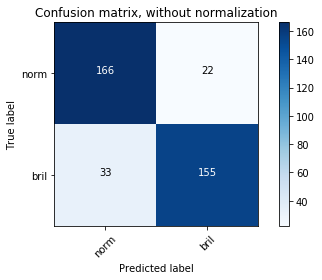

In [15]:
logreg = LogisticRegression(C=1e5, solver='lbfgs', multi_class='multinomial', random_state=100000, max_iter=1000)
from sklearn.metrics import r2_score
logreg.fit(X_train, y_train)

y_pred = logreg.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)*100
print('Accuracy of our model is equal ' + str(round(accuracy, 2)) + ' %.')


def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()


plt.figure()
plot_confusion_matrix(confusion_matrix(y_test, y_pred), classes=['norm', 'bril'],
                      title='Confusion matrix, without normalization')

In [16]:
def make_decisions(originaldata, variable_list):
    data = originaldata[variable_list]
    training,validation = validation_split(data, 0.7)
    training = flatten(training, variable_list)
    validation = flatten(validation, variable_list)

    X_train = training.drop(['Conditie', 'SubjectID'], axis=1)
    y_train = training['Conditie']
    X_train = X_train.astype(float)
    y_train = y_train.astype(int)
    
    X_test = validation.drop(['Conditie', 'SubjectID'], axis=1)
    y_test = validation['Conditie']
    X_test = X_test.astype(float)
    y_test = y_test.astype(int)
    
    logreg = LogisticRegression(C=1e5, solver='lbfgs', multi_class='multinomial', random_state=100000, max_iter=1000)

    logreg.fit(X_train, y_train)

    y_pred = logreg.predict(X_test)

    return accuracy_score(y_test, y_pred)



make_decisions(pdata, collist)

0.8164893617021277

In [19]:
# print('Accuracy Scores for different variables (mean of 100 loops)')
print('BMI, Age, mad_SegmentData:', np.mean([make_decisions(pdata, ['SubjectID', 'Conditie', 'GaitVelocity', 'mean_StepLength', 'Velocity']) for i in range(100)]))
# print('Height, Age, AverageStepLength:', np.mean([make_decisions(pdata, ['SubjectID', 'Conditie', 'Height', 'Age', 'AverageStepLength']) for i in range(100)]))
# print('BMI, Age, mad_SegmentData, AverageStepLength:', np.mean([make_decisions(pdata, ['SubjectID', 'Conditie', 'BMI', 'Age', 'AverageStepLength', 'mad_SegmentData']) for i in range(100)]))
# print('BMI, mad_SegmentData, AverageStepLength:', np.mean([make_decisions(pdata, ['SubjectID', 'Conditie', 'BMI', 'AverageStepLength', 'mad_SegmentData']) for i in range(100)]))
# print('Height, mad_SegmentData, AverageStepLength, Velocity:', np.mean([make_decisions(pdata, ['SubjectID', 'Conditie', 'Height', 'mad_SegmentData', 'AverageStepLength', 'Velocity']) for i in range(100)]))
# print('std_SegmentData, mad_SegmentData, AverageStepLength, Velocity:', np.mean([make_decisions(pdata, ['SubjectID', 'Conditie', 'std_SegmentData', 'mad_SegmentData', 'AverageStepLength', 'Velocity']) for i in range(100)]))
# print('std_SegmentData, mad_SegmentData, AverageStepLength:', np.mean([make_decisions(pdata, ['SubjectID', 'Conditie', 'std_SegmentData', 'mad_SegmentData', 'AverageStepLength']) for i in range(100)]))
# print('Velocity, mad_SegmentData, AverageStepLength:', np.mean([make_decisions(pdata, ['SubjectID', 'Conditie', 'Velocity', 'mad_SegmentData', 'AverageStepLength']) for i in range(100)]))
# print('AverageStepLength, Velocity:', np.mean([make_decisions(pdata, ['SubjectID', 'Conditie','AverageStepLength', 'Velocity']) for i in range(100)]))
# print('mad_SegmentData, Velocity:', np.mean([make_decisions(pdata, ['SubjectID', 'Conditie','mad_SegmentData', 'Velocity']) for i in range(100)]))
# print('mad_SegmentData, AverageStepLength:', np.mean([make_decisions(pdata, ['SubjectID', 'Conditie', 'mad_SegmentData', 'AverageStepLength']) for i in range(100)]))
# print('mad_SegmentData, AverageStepLength, 6,0,01:', np.mean([make_decisions(pdata, ['SubjectID', 'Conditie','mad_SegmentData', 'AverageStepLength']) for i in range(100)]))


Accuracy Scores for different variables (mean of 100 loops)
BMI, Age, mad_SegmentData: 0.83125
Height, Age, AverageStepLength: 0.8316517857142857
BMI, Age, mad_SegmentData, AverageStepLength: 0.8255357142857143
BMI, mad_SegmentData, AverageStepLength: 0.8248660714285715
Height, mad_SegmentData, AverageStepLength, Velocity: 0.8432589285714287
std_SegmentData, mad_SegmentData, AverageStepLength, Velocity: 0.8429017857142859
std_SegmentData, mad_SegmentData, AverageStepLength: 0.838125
Velocity, mad_SegmentData, AverageStepLength: 0.8309821428571429
AverageStepLength, Velocity: 0.8322767857142856
mad_SegmentData, Velocity: 0.8320535714285715
mad_SegmentData, AverageStepLength: 0.8220535714285714
mad_SegmentData, AverageStepLength, 6,0,01: 0.8260267857142856
